In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#### PRIMEIRO EXEMPLO ####
#leitura dos dados
dados = pd.read_csv('dados.csv')

In [3]:
#exibindo os primeiros 5 valores
dados.head()

,valores
0,156
1,145
2,157
3,159
4,161


In [4]:
#describe fornece umas infos preliminares bastante úteis
dados.describe().round(2)

,valores
count,128.00
mean,167.13
std,42.70
min,21.00
25%,152.00
50%,164.00
75%,177.00
max,415.00


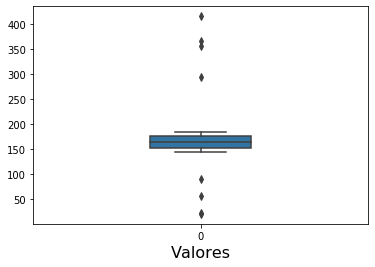

In [5]:
# box plot é útil na visualização de alguma var de interesse

ax = sns.boxplot(data=dados['valores'], orient='v', width=0.3)
ax.set_xlabel('Valores', fontsize=16)
ax

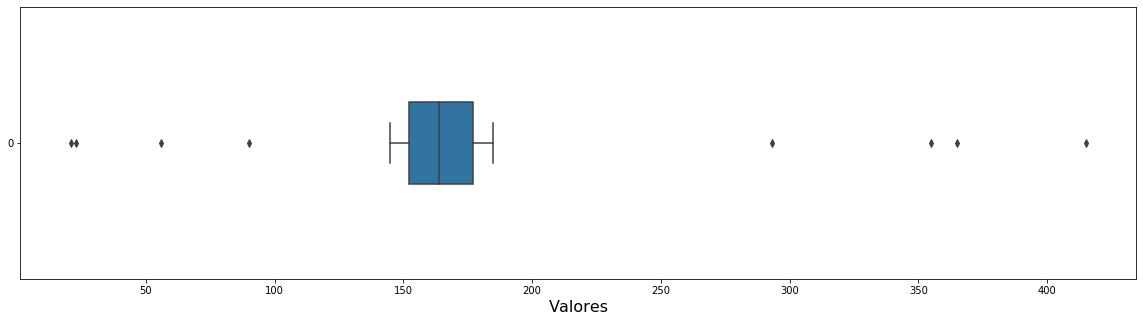

In [6]:
# box plot pode ser visto na horizontal também

ax = sns.boxplot(data=dados['valores'], orient='h', width=0.3)

ax.figure.set_size_inches(20,5)

ax.set_xlabel('Valores', fontsize=16)
ax

In [7]:
## calculando os limitantes (whiskers)
# valores acima dos whiskers geralmente sao outliers

data = dados['valores']
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

print(upper_whisker, lower_whisker)

185 145


145.0 185.0


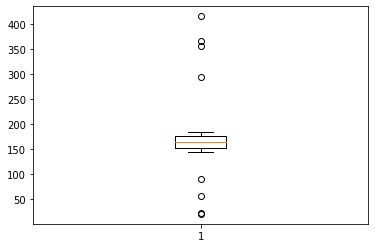

In [8]:
## box abaixo nao eh com searborn, mas com matplotlib puro
## da pra aplicar o truque para obter automaticamente a saida com os valroes dos whiskers

B = plt.boxplot(dados['valores'])
saida = [item.get_ydata() for item in B['whiskers']]
print(saida[0][1], saida[1][1])

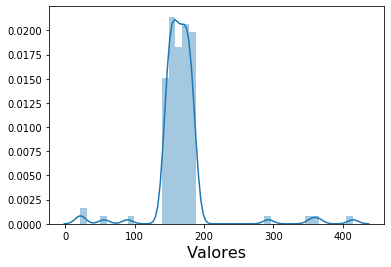

In [9]:
# distribuicao de frequencias
# outra maneira legal de investigar os dados
# habitualmente a frequencia tente a uma distribuicao normal

ax = sns.distplot(dados['valores'])
ax.set_xlabel('Valores', fontsize=16)
ax

In [10]:
# filtrando os dados que tenham valor exatamente 150 (aprendendo como faz um filtro no pandas)
dados[(dados['valores'] == 150)]

,valores
12,150
48,150
74,150
92,150
108,150


In [11]:
# aprendido como faz um filtro, vamos fazer um pra outliers
# filtrando os dados que tenham valor maior que 145 (whisker inferior) e menor que 185 (whisker superior)

dados[(dados['valores'] >= 145) & (dados['valores'] <= 185)]

,valores
0,156
1,145
2,157
3,159
4,161
...,...
115,156
116,168
117,153
118,161


In [12]:
# atribuindo a uma nova var o filtro implementado
novos_dados = dados[(dados['valores'] >= 145) & (dados['valores'] <= 185)]

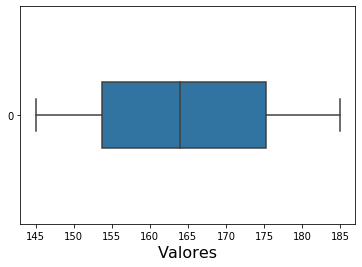

In [13]:
# box plot dos dados filtrados

ax = sns.boxplot(data=novos_dados['valores'], orient='h', width=0.3)
ax.set_xlabel('Valores', fontsize=16)
ax

In [14]:
######
## Exemplo 2 ##


In [15]:
#leitura dos dados
dados = pd.read_csv('dataset.csv', sep=';')
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [16]:
# estatisticas descritivas
dados["Valor"].describe().round(2)

count        5000.00
mean      1402926.39
std       1883268.85
min         75000.00
25%        460000.00
50%        820000.00
75%       1590000.00
max      25000000.00
Name: Valor, dtype: float64

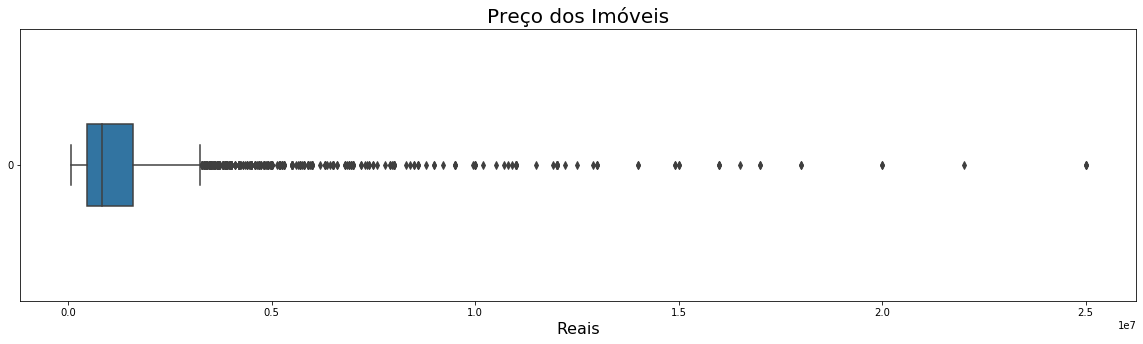

In [17]:
# box plot pelo seaborn

ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)

ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos Imóveis',  fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

75000.0 3250000.0


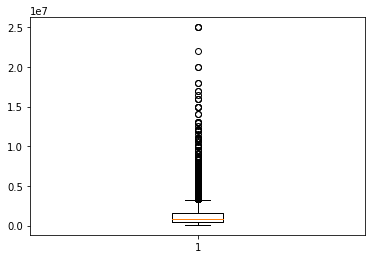

In [18]:
## box plot matplotlib para usar o truque dos whiskers

B = plt.boxplot(dados['Valor'])
saida = [item.get_ydata() for item in B['whiskers']]
print(saida[0][1], saida[1][1])

In [19]:
# caso filtrassemos esses outliers
teste = dados[(dados['Valor'] >= 75000) & (dados['Valor'] <= 3250000)]

print('Antes do filtro tinhamos {} dados e após temos {}. Portanto, {} dados foram filtrados'.format(len(dados),len(teste),len(dados)-len(teste)))

Antes do filtro tinhamos 5000 dados e após temos 4564. Portanto, 436 dados foram filtrados


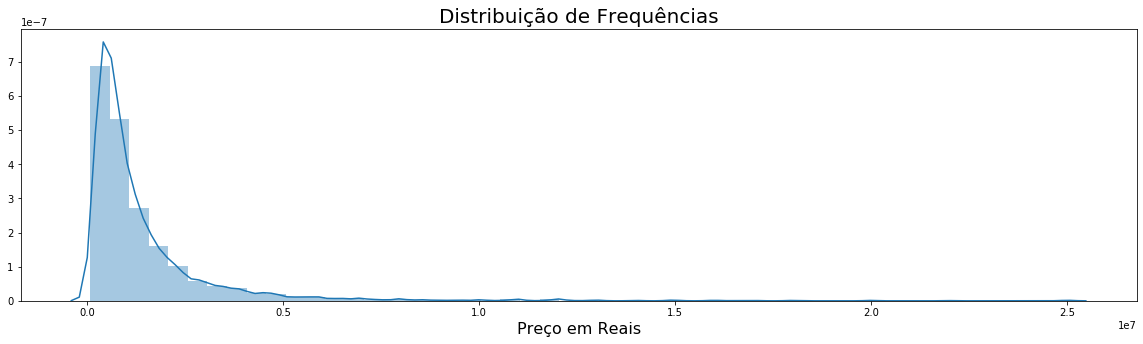

In [20]:
# será que todos eram outliers mesmo?
# vamos investigar mais!

# distribuicao de frequencias

ax = sns.distplot(dados['Valor'])

ax.figure.set_size_inches(20,5)
ax.set_title('Distribuição de Frequências',  fontsize=20)
ax.set_xlabel('Preço em Reais', fontsize=16)
ax

In [21]:
## temos uma normal deslocada. (parece com uma normal, mas o braço direito é MUITO maior que o esquerdo)
## vou tentar uma transformação logaritmica

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 7 Text yticklabel objects>)

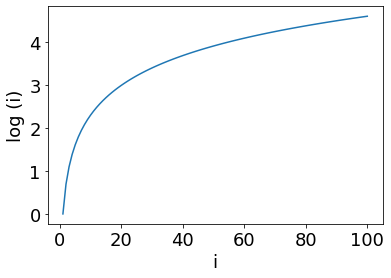

In [22]:
# antes vamos ver o perfil da função log
vet_i = []
vet_log_i = []
for i in range(0,101):
    vet_i.append(i)
    vet_log_i.append(np.log(i))
    
plt.plot(vet_i,vet_log_i)
plt.xlabel('i', fontsize=18)
plt.ylabel('log (i)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [23]:
print(np.log(1)) #log de 1 é zero
print(np.log(0)) #log de 0 tente ao menos inf

0.0
-inf


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [24]:
# estratégia, antes de aplicar o log, pode ser prudente somar 1 unidade, pois assim caso
# tenhamos um zero na amostra, essa não nos trará problemas com valores de -inf
print(np.log(70000))
print(np.log(70000+1))

11.156250521031495
11.156264806643742


vetor_y:  [1, 10, 100, 1000, 10000, 100000]
vetor_log_y:  [0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184, 11.512925464970229]


[Text(0, 0.5, 'log Y'), Text(0.5, 0, 'X')]

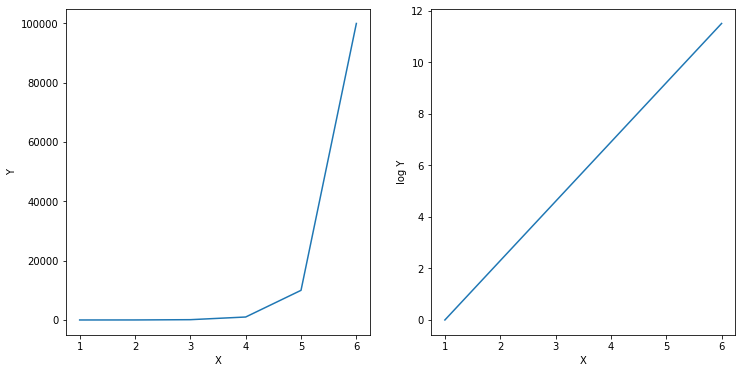

In [25]:
# mas pq log?
# log lineazira grandezas que crescem/descrescem de forma não-linear

vet_x = [1,2,3,4,5,6]
vet_y = [1,10,100,1000,10000,100000]
vet_log_y = []
for i in range(0,len(vet_y)):
    vet_log_y.append(np.log(vet_y[i]))

print('vetor_y: ',vet_y)
print('vetor_log_y: ',vet_log_y)
    
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,6)


ax1.plot(vet_x, vet_y)
ax2.plot(vet_x, vet_log_y)

ax1.set(xlabel='X', ylabel='Y')
ax2.set(xlabel='X', ylabel='log Y')

In [26]:
# voltando ao ex, adicionando uma coluna ao DF com o log do valor
# apesar de eu saber que nao tem valores zero, somei 1 mesmo assim, so pra garantir
dados['log_Valor'] = np.log(dados['Valor']+1)

In [27]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor
0,4600000,280,0.240925,0.793637,15.341567
1,900000,208,0.904136,0.134494,13.710151
2,2550000,170,0.059525,0.423318,14.751604
3,550000,100,2.883181,0.525064,13.217675
4,2200000,164,0.239758,0.192374,14.603968


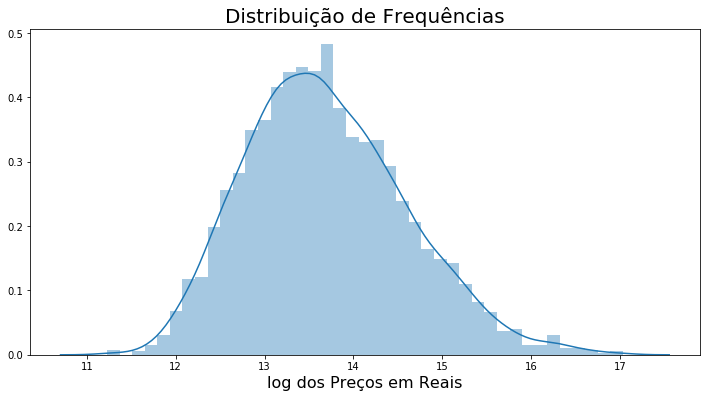

In [28]:
# distribuicao de frequencias de log valor

ax = sns.distplot(dados['log_Valor'])

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências',  fontsize=20)
ax.set_xlabel('log dos Preços em Reais', fontsize=16)
ax

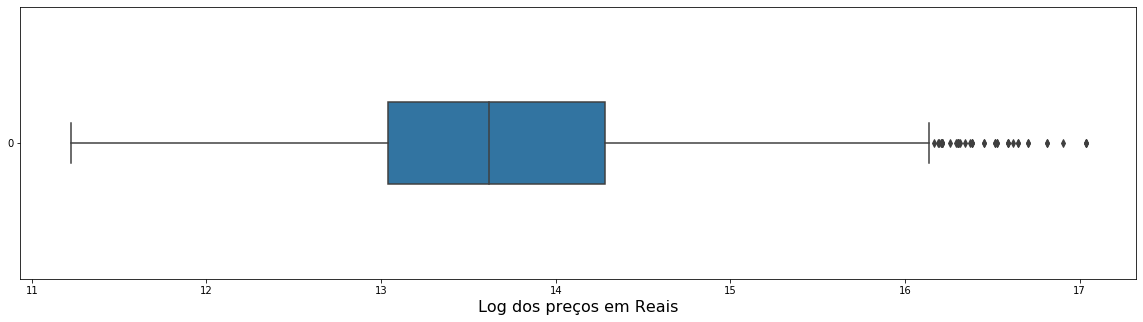

In [29]:
# box plot pelo seaborn (comparar com o primeiro e notar que há menos outliers)

ax = sns.boxplot(data=dados['log_Valor'], orient='h', width=0.3)

ax.figure.set_size_inches(20,5)
ax.set_xlabel('Log dos preços em Reais', fontsize=16)
ax

11.225256725762893 16.13789837629371


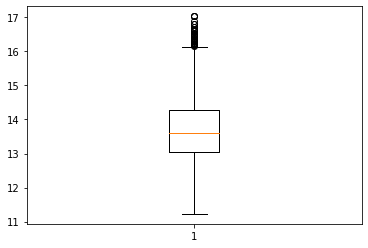

In [30]:
# truque dos whiskers
B = plt.boxplot(dados['log_Valor'])
saida = [item.get_ydata() for item in B['whiskers']]
print(saida[0][1], saida[1][1])

In [31]:
# filtando outliers
novos_dados = dados[(dados['log_Valor'] >= 11.225) & (dados['log_Valor'] <= 16.137)]

print('original: {}'.format(len(dados)))
print('filtro sem transformação: {} -> (diferença: {})'.format(len(teste),(len(dados)-len(teste))))
print('filtro com transformação: {} -> (diferença: {})'.format(len(novos_dados),(len(dados)-len(novos_dados))))

original: 5000
filtro sem transformação: 4564 -> (diferença: 436)
filtro com transformação: 4951 -> (diferença: 49)


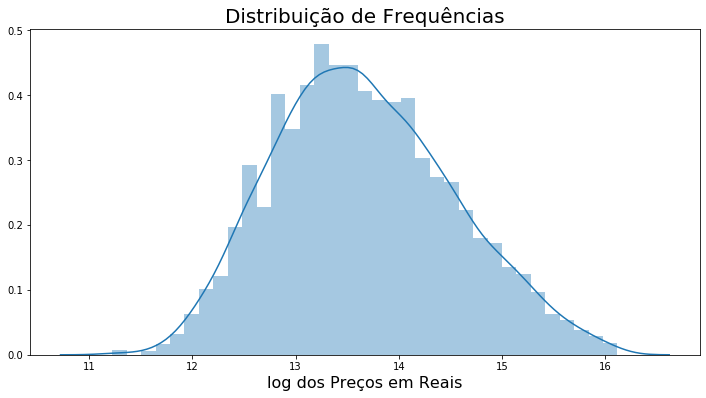

In [32]:
# distribuicao de frequencias de log valor

ax = sns.distplot(novos_dados['log_Valor'])

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências',  fontsize=20)
ax.set_xlabel('log dos Preços em Reais', fontsize=16)
ax

In [33]:
#lembrar que ao tratar por ex valores monetarios preciso do valor convencional, e nao do log valor
# por isso a boa pratica nos manda criar uma coluna extra de log pros filtros
# mas manter a coluna de valores originais
novos_dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor
0,4600000,280,0.240925,0.793637,15.341567
1,900000,208,0.904136,0.134494,13.710151
2,2550000,170,0.059525,0.423318,14.751604
3,550000,100,2.883181,0.525064,13.217675
4,2200000,164,0.239758,0.192374,14.603968
